In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os


%matplotlib inline

In [2]:
data_dir = "C:/Users/Kelvin Chumbe/Downloads/Datasets/Capstone_Twitter Modelling Datasets/Disaster Tweets Combined"

In [3]:
# Read in the data
tweets = pd.read_csv(os.path.join(data_dir, 'disaster_tweets.csv'))

In [4]:
tweets.head(2)

,ID,Tweet,Label
0,383600460340666369',RT @Faiz_Baluch: #BalochistanEarthQuake Pakist...,other_useful_information
1,383790723222364161',#Earthquake 2013-09-28 02:39:43 (M5.0) EAST OF...,other_useful_information


In [5]:
# Shape of the data
tweets.shape

(71154, 3)

In [6]:
# Look at some summary statistics about the data
tweets.describe()

,ID,Tweet,Label
count,71141,71142,71141
unique,71118,68055,62
top,'541460791589748736',RT @ddlovato: So sad to hear about the nightcl...,Other Useful Information
freq,2,108,7625


#### **Observation**
* There are duplicate IDs
* There are duplicate tweets
* Shape of the data is not similar to the counts of the tweets (Might indicate presence of null observations)

In [7]:
# Look at the dtypes of the data and their counts
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71154 entries, 0 to 71153
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      71141 non-null  object
 1   Tweet   71142 non-null  object
 2   Label   71141 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [8]:
# Check for null values
tweets.isnull().sum()

ID       13
Tweet    12
Label    13
dtype: int64

In [9]:
# Drop any null rows or rows with a null feature
tweets = tweets.dropna(axis=0)

In [10]:
tweets.shape

(71141, 3)

In [11]:
# Confirm there's no nulls in the data
tweets.isnull().sum()

ID       0
Tweet    0
Label    0
dtype: int64

In [12]:
# Check for the duplicated IDs 
tweets[tweets['ID'].duplicated(keep='first')]

,ID,Tweet,Label
20599,'541249463734370304',Power is out again in Banawa #RubyPH,Not Informative
20942,'541316404847591424',"Typhoon #Hagupit ""#Ruby"" #Philippines http://t...",Not Informative
21227,'541378350053208064',Praying for everyones safety. �__F�__F�__F #Ru...,Not Informative
21353,'541391184216592385',True! #PrayHarderAndBeSafe #RubyPh http://t.co...,Not Informative
22051,'541455987543379968',http://t.co/hICUn1n1c3 Prayers for my Cousin J...,Not Informative
22159,'541460791589748736',Bed weather is bed weather #RubyPH �__8�__4�_�...,Not Informative
22188,'541462559182700544',@UNDP:���@abcnews:At least two dead in #borong...,Not Informative
22564,'541483446133350401',"#RubyPH overtake power lines as well, not one ...",Other Relevant Information
22823,'541498918375141376',"""@TagaLPU: #WalangPasok December 8, 2014 ALL L...",Not Informative
23031,'541513820598853634',I guess #hagupit can't beat ondoy or yolanda #...,Not Informative


In [13]:
# Drop duplicated ID
duplicated_ids = tweets[tweets['ID'].duplicated(keep='first')].index
tweets = tweets.drop(duplicated_ids, axis=0)

In [14]:
tweets.shape

(71118, 3)

In [15]:
# Check for tweets with duplicated text
tweets[tweets['Tweet'].duplicated(keep=False)]

,ID,Tweet,Label
2712,505229158327148546',Violent quake rocks Bay Area: Are more aftersh...,other_useful_information
2784,503870731831111680',Strong 6.0 #California #EarthQuake Surprises a...,other_useful_information
2992,504284375115370496',Earthquake Warning Systems Exist. But Californ...,other_useful_information
3067,503903767750651904',California hit with worst quake in 25 years: N...,infrastructure_and_utilities_damage
6136,451470880778878976',Chile earthquake: rush to evacuate coast after...,other_useful_information
...,...,...,...
71082,72932164118908800,@andersoncooper: I took this earlier. Cross s...,Damage
71092,77578899676069600,@weatherchannel: Sad news to report. 3 more p...,Casualty
71103,77558589681708800,@weatherchannel: Sad news to report. 3 more p...,Casualty
71111,72646038405660608,@NBCActionNews: 89 confirmed deaths in #Jopli...,Casualty


#### **Observations**
* Duplicated tweets with different IDs may be due to retweets or reposts of the tweets. They should be removed

In [16]:
# Drop instances of duplicated tweets
duplicated_tweets_idx = tweets[tweets['Tweet'].duplicated(keep='first')].index
tweets = tweets.drop(duplicated_tweets_idx, axis=0)

In [17]:
tweets.shape

(68045, 3)

In [18]:
# Look the the unique labels/ categories of tweets and their count
tweets['Label'].unique(), len(tweets['Label'].unique())

(array(['other_useful_information',
        'donation_needs_or_offers_or_volunteering_services',
        'not_related_or_irrelevant', 'injured_or_dead_people',
        'sympathy_and_emotional_support', 'caution_and_advice',
        'infrastructure_and_utilities_damage',
        'displaced_people_and_evacuations',
        'missing_trapped_or_found_people', 'Infrastructure and utilities',
        'Other relevant information', 'Not related or irrelevant',
        'Injured or dead people', 'Sympathy and emotional support',
        'Caution and advice', 'Personal updates', 'Money',
        'Personal updates, sympathy, support', 'Other useful information',
        'Injured and dead', 'Donations of money', 'Infrastructure',
        'Needs of those affected', 'Displaced people',
        'Shelter and supplies', 'Not related to crisis', 'Informative',
        'Not informative', 'Non-government', 'Not Informative',
        'Requests for Help/Needs', 'Other Relevant Information',
        'Infrastr

In [19]:
# Read category mappings file to map tweet labels to their respective categories
mappings_file = os.path.join(data_dir, 'Tweet_Category_Mappings_v2.txt')
mappings_dict = {}

with open(mappings_file, 'r') as file:    
    while True: 
        line = file.readline()
        
        if line != '':
            arr = line.split('\t')
            mappings_dict[arr[0]] = arr[1].strip('\n')
        else:
            break
    
mappings_dict

{'donation_needs_or_offers_or_volunteering_services': 'Relief Request and Donations',
 'injured_or_dead_people': 'Casualty',
 'sympathy_and_emotional_support': 'Sympathy and Support',
 'infrastructure_and_utilities_damage': 'Damage Report',
 'caution_and_advice': 'Caution and Advice',
 'Sympathy and emotional support': 'Sympathy and Support',
 'Infrastructure Damage': 'Damage Report',
 'Personal updates, sympathy, support': 'Sympathy and Support',
 'Humanitarian Aid Provided': 'Relief Request and Donations',
 'Caution and advice': 'Caution and Advice',
 'Infrastructure and utilities': 'Damage Report',
 'Infrastructure': 'Damage Report',
 'Injured or dead people': 'Casualty',
 'Urgent Needs': 'Relief Request and Donations',
 'Injured and dead': 'Casualty',
 'Needs of those affected': 'Relief Request and Donations',
 'Requests for Help/Needs': 'Relief Request and Donations',
 'Money': 'Relief Request and Donations',
 'Shelter and supplies': 'Relief Request and Donations',
 'Donations of 

In [20]:
# Convert tweet labels using the mappings dictionary to the relevant categories
def map_label_category(label):
    return mappings_dict.get(label, None)    # Return None for labels not present in the dictionary
    

tweets['Category'] = tweets['Label'].apply(lambda x: map_label_category(x))

In [21]:
tweets.head()

,ID,Tweet,Label,Category
0,383600460340666369',RT @Faiz_Baluch: #BalochistanEarthQuake Pakist...,other_useful_information,None
1,383790723222364161',#Earthquake 2013-09-28 02:39:43 (M5.0) EAST OF...,other_useful_information,None
2,384232048124518400',#earthquake M2.2: Puerto Rico region http://t....,other_useful_information,None
3,384860484643475456',#PAKISTAN: #NASA releases images of Pakistan's...,other_useful_information,None
4,383407962619772928',"【#USGS #alert】 M 1.5, Central Alaska: Septembe...",other_useful_information,None


In [22]:
# Look at the count of unique values in the category column
tweets['Category'].value_counts()

Sympathy and Support            7043
Relief Request and Donations    6152
Caution and Advice              4077
Damage Report                   3918
Casualty                        3097
Name: Category, dtype: int64

In [23]:
# Check for None values in the categories column 
tweets['Category'].isnull().sum()

43758

In [24]:
# Drop None rows in the category column
# null_category_idx = tweets['Category'].isna().index
tweets = tweets.dropna()

In [25]:
# Reset the tweets index
tweets = tweets.reset_index(drop=True)

In [26]:
tweets.head()

,ID,Tweet,Label,Category
0,384275270082887680',RT @AQpk: RT @313syiSitak: #YFK volunteers sha...,donation_needs_or_offers_or_volunteering_services,Relief Request and Donations
1,383596911598768128',RT @CNBCPAKISTAN: Minister of State Sheikh Aft...,injured_or_dead_people,Casualty
2,384041956038303744',RT @kkfpk: Pic-9 #KKF send relief goods for #B...,donation_needs_or_offers_or_volunteering_services,Relief Request and Donations
3,384607507382935552',RT @AnasMallick: Day 7th and some parts of Bal...,donation_needs_or_offers_or_volunteering_services,Relief Request and Donations
4,383487691297284098',Field Mecical Camps and lady doctors are also ...,donation_needs_or_offers_or_volunteering_services,Relief Request and Donations


In [27]:
# Look at the count of unique values in the category column
tweets['Category'].value_counts()

Sympathy and Support            7043
Relief Request and Donations    6152
Caution and Advice              4077
Damage Report                   3918
Casualty                        3097
Name: Category, dtype: int64

In [28]:
tweets.shape

(24287, 4)

In [29]:
# Drop the Label column
tweets = tweets.drop('Label', axis=1)

In [30]:
tweets.shape

(24287, 3)

In [31]:
tweets.head()

,ID,Tweet,Category
0,384275270082887680',RT @AQpk: RT @313syiSitak: #YFK volunteers sha...,Relief Request and Donations
1,383596911598768128',RT @CNBCPAKISTAN: Minister of State Sheikh Aft...,Casualty
2,384041956038303744',RT @kkfpk: Pic-9 #KKF send relief goods for #B...,Relief Request and Donations
3,384607507382935552',RT @AnasMallick: Day 7th and some parts of Bal...,Relief Request and Donations
4,383487691297284098',Field Mecical Camps and lady doctors are also ...,Relief Request and Donations


In [32]:
# Save mapped tweets to file
tweets.to_csv(os.path.join(data_dir, "Mapped_Tweets.csv"), index=False)

## **Data Preprocessing**

In [33]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
# nltk.download('stopwords')
nltk.download('wordnet')
# nltk.download('punkt')

[nltk_data] Downloading package wordnet to C:\Users\Kelvin
[nltk_data]     Chumbe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
STOPWORDS = stopwords.words('english')

In [35]:
# Dictionary mapping word contractions to their full words
contractions = { 
    "ain't": "are not","'s":" is","aren't": "are not",
     "can't": "cannot","can't've": "cannot have",
     "'cause": "because","could've": "could have","couldn't": "could not",
     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
     "hasn't": "has not","haven't": "have not","he'd": "he would",
     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
     "it'd": "it would","it'd've": "it would have","it'll": "it will",
     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
     "mayn't": "may not","might've": "might have","mightn't": "might not", 
     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
     "mustn't've": "must not have", "needn't": "need not",
     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
     "she'll": "she will", "she'll've": "she will have","should've": "should have",
     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
     "there'd've": "there would have", "they'd": "they would",
     "they'd've": "they would have","they'll": "they will",
     "they'll've": "they will have", "they're": "they are","they've": "they have",
     "to've": "to have","wasn't": "was not","we'd": "we would",
     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
     "what'll've": "what will have","what're": "what are", "what've": "what have",
     "when've": "when have","where'd": "where did", "where've": "where have",
     "who'll": "who will","who'll've": "who will have","who've": "who have",
     "why've": "why have","will've": "will have","won't": "will not",
     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
     "y'all'd've": "you all would have","y'all're": "you all are",
     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
     "you'll": "you will","you'll've": "you will have", "you're": "you are",
     "you've": "you have"
}

SAMPLE TWEET

    'RT @AQpk: RT @313syiSitak: #YFK volunteers share their views on #Kashmir with Farah in her live Morning Show on #ATV http://t.co/alLPKCLeDy…'

In [36]:
# # Remove punctutation marks, stopwords, emojis, urls, convert to lowercase, expand contractions, hashtags, retweet
# def preprocess_tweet(tweet):
#     res_tweet = []
#     lemmatizer = WordNetLemmatizer()
    
#     for word in tweet.split():        
        
#         # Expand Contractions
#         word = contractions.get(word.lower(), word)
        
#         # Remove stopwords
#         if word not in STOPWORDS:
            
#             # Remove url
#             word = re.sub(r'http\S+', '', word)
            
#             # Remove usernames
#             word = re.sub('@[\w]+','',word)
            
#             # Remove hashtag
#             word = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", '', word)         # Remove hashtag symbol
# #             word = re.sub(r'#[\w]+', '', word)           # Remove hashtag symbol and text
    
#             emoji_clean= re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
#             word = emoji_clean.sub(r'', word)
            
#              # Remove punctuation
#             word = re.sub(r'[^\w\s]', '', word)
                        
#             # Remove Retweet
#             word = re.sub(r'RT', '', word)
            
#             # Convert to lowercase
#             word = word.lower()
            
#             # Lemmatize the word
#             word = lemmatizer.lemmatize(word, pos='v')
        
#             if word != '':
#                 res_tweet.append(word)
    

#     return ' '.join([word for word in res_tweet]) 

In [37]:
# Remove punctutation marks, stopwords, emojis, urls, convert to lowercase, expand contractions, hashtags, retweet
def preprocess_tweet(tweet):
    res_tweet = []
#     lemmatizer = WordNetLemmatizer()
    
    for word in tweet.split():        
        
        # Expand Contractions
        word = contractions.get(word.lower(), word)
            
        # Remove url
        word = re.sub(r'http\S+', '', word)

        # Remove usernames
        word = re.sub('@[\w]+','',word)

        # Remove hashtag
        word = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", '', word)         # Remove hashtag symbol

        emoji_clean= re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)
        word = emoji_clean.sub(r'', word)

        # Remove Retweet
        word = re.sub(r'RT', '', word)

        # Convert to lowercase
        word = word.lower()

        if word != '':
            res_tweet.append(word)


    return ' '.join([word for word in res_tweet]) 

In [38]:
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess_tweet(x))

In [39]:
tweets.head()

,ID,Tweet,Category
0,384275270082887680',yfk volunteers share their views on kashmir wi...,Relief Request and Donations
1,383596911598768128',minister of state sheikh aftab 9 soldiers and ...,Casualty
2,384041956038303744',pic9 kkf send relief goods for balochistan ear...,Relief Request and Donations
3,384607507382935552',day 7th and some parts of balochistan hit by e...,Relief Request and Donations
4,383487691297284098',field mecical camps and lady doctors are also ...,Relief Request and Donations


In [40]:
# # Save preprocessed tweets to file
# tweets.to_csv(os.path.join(data_dir,'Preprocessed_tweets.csv'), index=False)

## **Exploratory Data Analysis**

<AxesSubplot:>

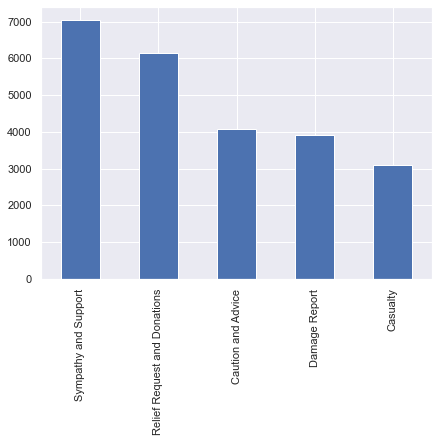

In [41]:
# Look at the distribution of categories in the tweets
fig = plt.figure(figsize=(7,5))
ax = fig.gca()
tweets['Category'].value_counts().plot(kind='bar', ax=ax)

In [42]:
category_dist = pd.DataFrame(data=tweets['Category'].value_counts(), columns=['Category'])
category_dist = category_dist.rename(columns={
    'Category': 'Count'
})
category_dist['Percentage of Total'] = category_dist['Count'] / tweets.shape[0]
category_dist

,Count,Percentage of Total
Sympathy and Support,7043,0.289991
Relief Request and Donations,6152,0.253304
Caution and Advice,4077,0.167868
Damage Report,3918,0.161321
Casualty,3097,0.127517


#### **Observations**
* The distribution of categories is quite imbalanced with Search and Rescue being about 3% of all the tweets

### **Analysis to Consider**
The meta features used for the analysis are;

* word_count number of words in text
* unique_word_count number of unique words in text
* stop_word_count number of stop words in text
* url_count number of urls in text
* mean_word_length average character count in words
* char_count number of characters in text
* punctuation_count number of punctuations in text
* hashtag_count number of hashtags (#) in text
* mention_count number of mentions (@) in text

In [43]:
from nltk.probability import FreqDist

In [44]:
tweet_tokens = [word for tweet in tweets['Tweet'] for word in tweet.split()]
fdist = FreqDist(tweet_tokens)

<AxesSubplot:>

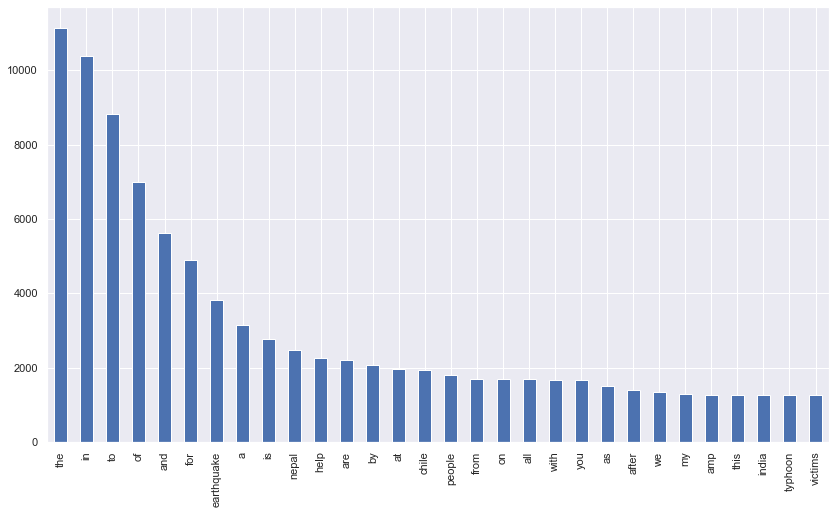

In [45]:
fig = plt.figure(figsize=(14,8))
ax = fig.gca()

pd.Series(dict(fdist.most_common(30))).plot(kind='bar', ax=ax)

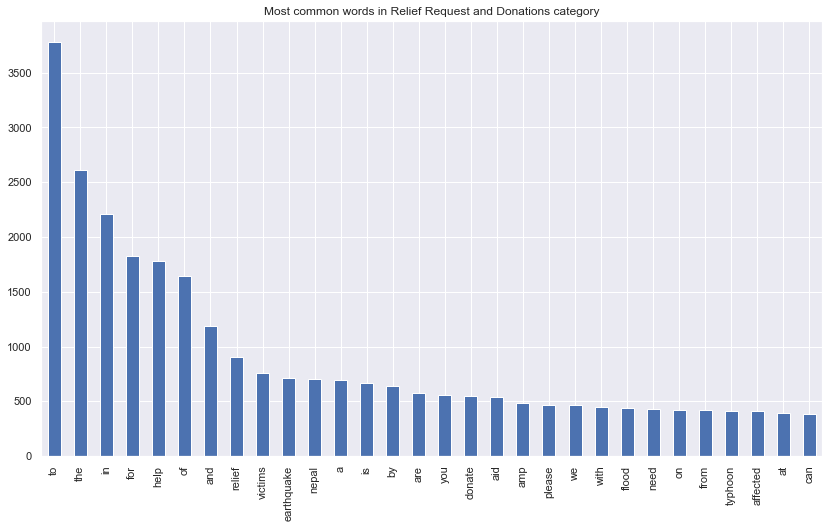

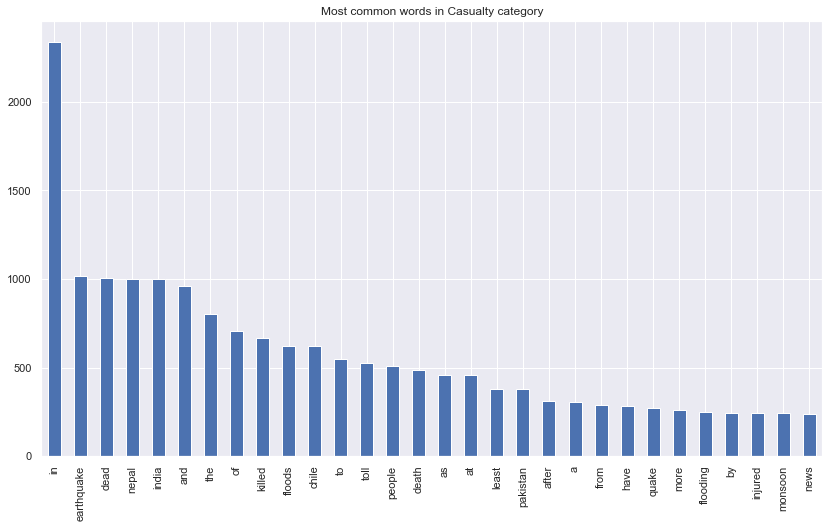

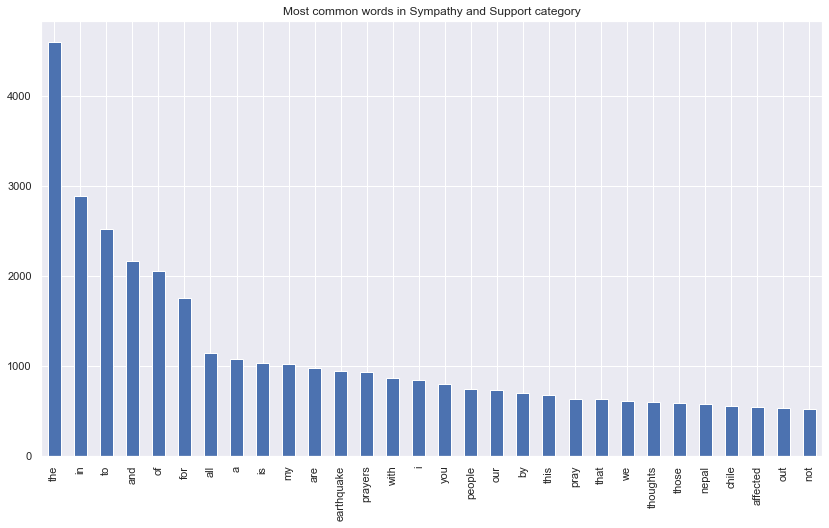

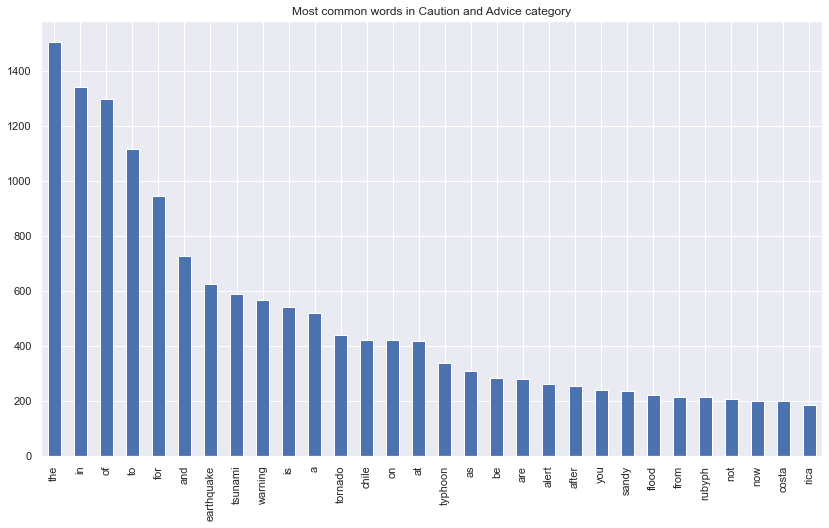

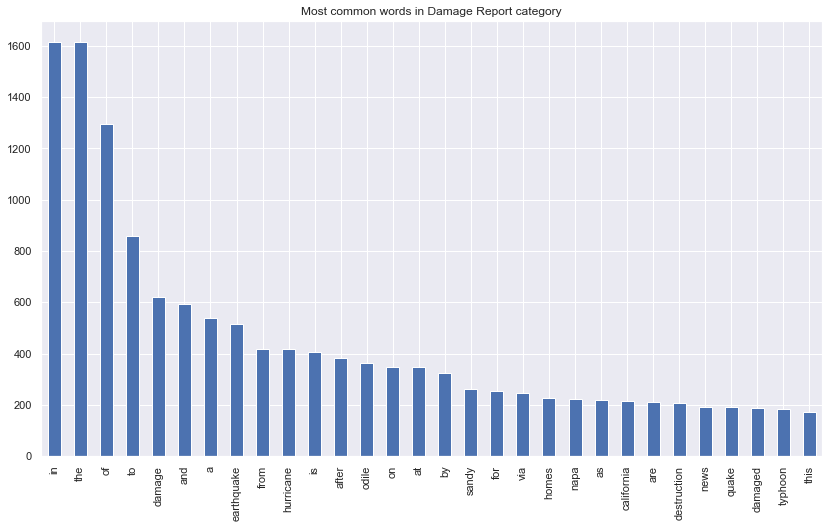

In [46]:
for category in tweets['Category'].unique():
    tweet_tokens = [word for tweet in tweets[tweets['Category'] == category]['Tweet'] for word in tweet.split()]
    fdist = FreqDist(tweet_tokens)
    
    fig = plt.figure(figsize=(14,8))
    ax = fig.gca()

    pd.Series(dict(fdist.most_common(30))).plot(kind='bar', ax=ax)
    plt.title('Most common words in ' + category + ' category')

In [47]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [48]:
def display_cloud(label):
    plt.subplots(figsize=(10,10))
    text = tweets[tweets['Category']==label]["Tweet"].tolist()
    wc = WordCloud(
      stopwords=STOPWORDS,
      background_color='white',
      colormap='Blues',
      collocations=False,
      width=1800,
      height=800,
    )
    wc.generate(' '.join(text))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.title(label,fontsize=24)
    plt.show()

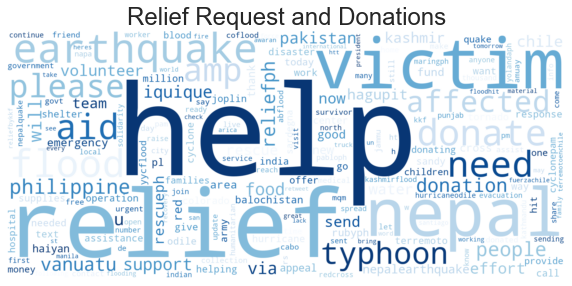

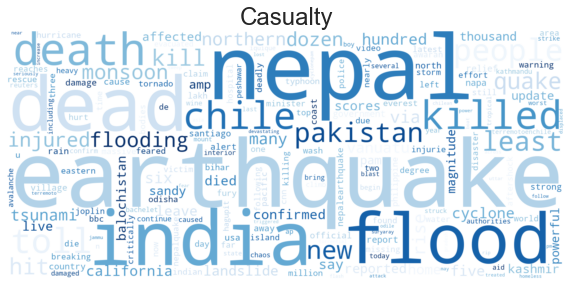

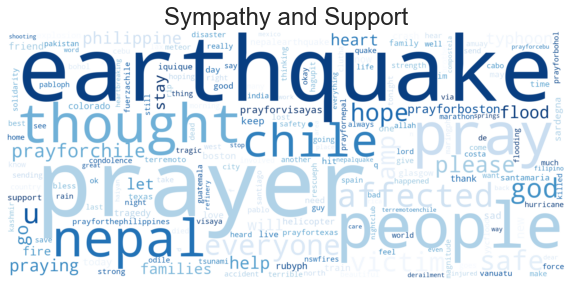

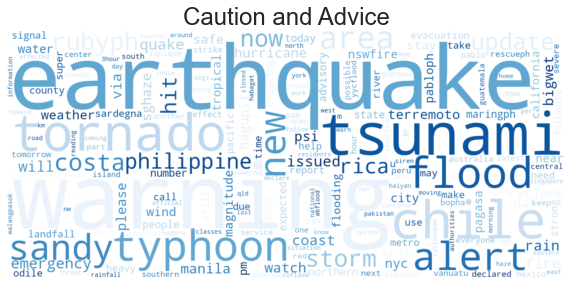

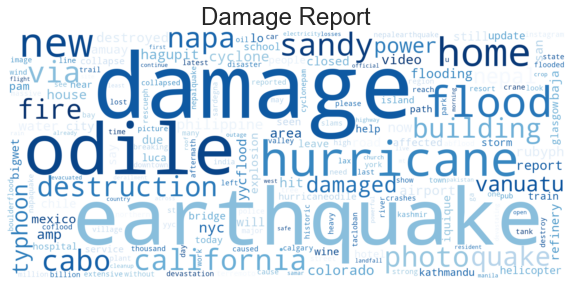

In [49]:
for category in tweets['Category'].unique():
    display_cloud(category)

<AxesSubplot:>

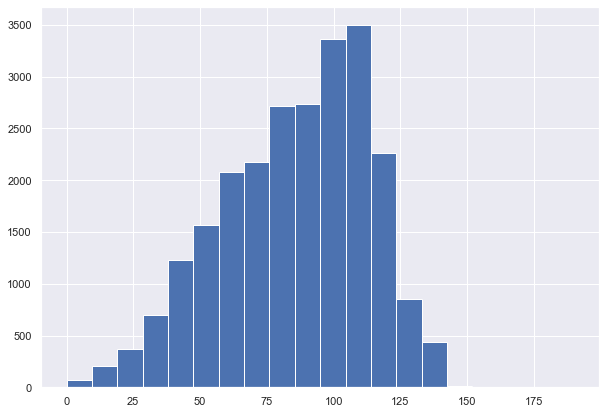

In [50]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca() 
    
tweets['Tweet'].str.len().hist(bins=20, ax=ax)

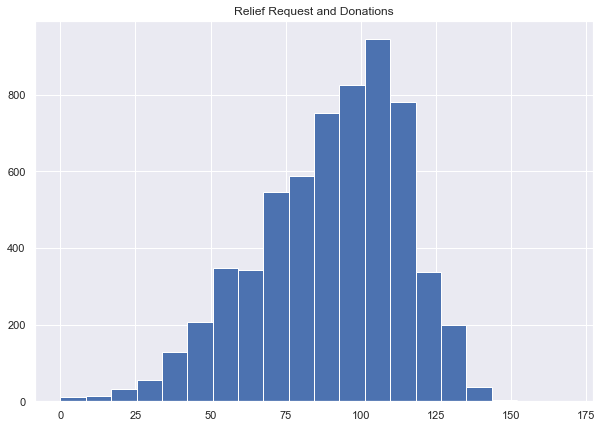

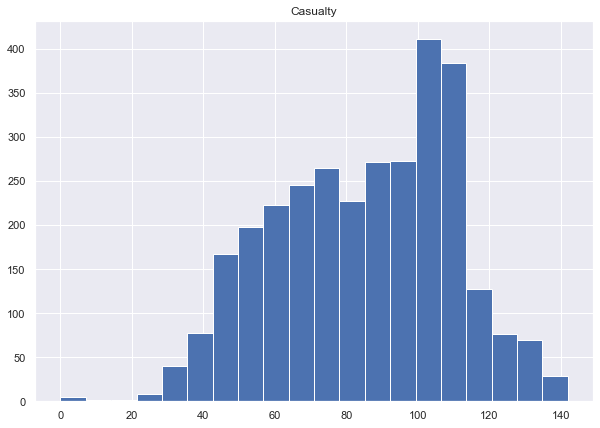

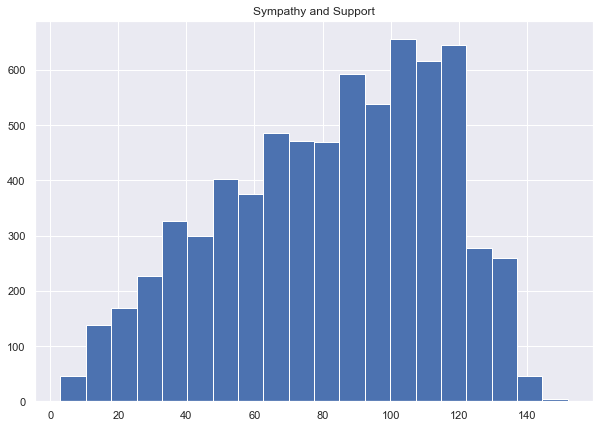

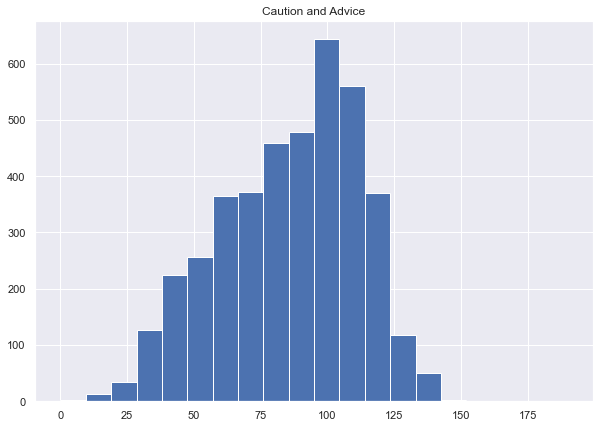

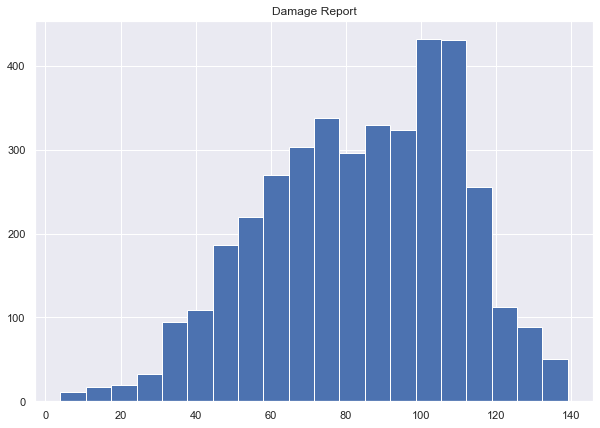

In [51]:
for category in tweets['Category'].unique():
    fig = plt.figure(figsize=(10,7))
    ax = fig.gca()
    
    tweets[tweets['Category'] == category]['Tweet'].str.len().hist(bins=20, ax=ax)
    plt.title(category)

In [52]:
from nltk.util import ngrams

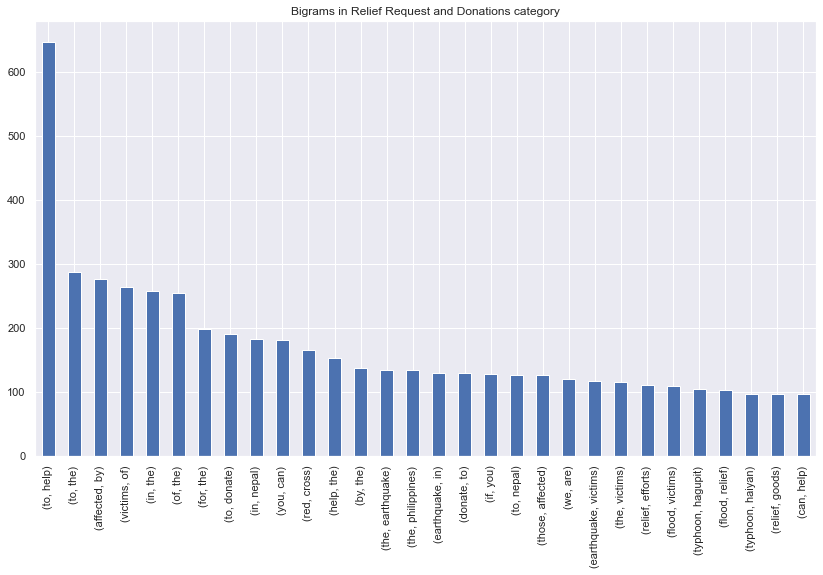

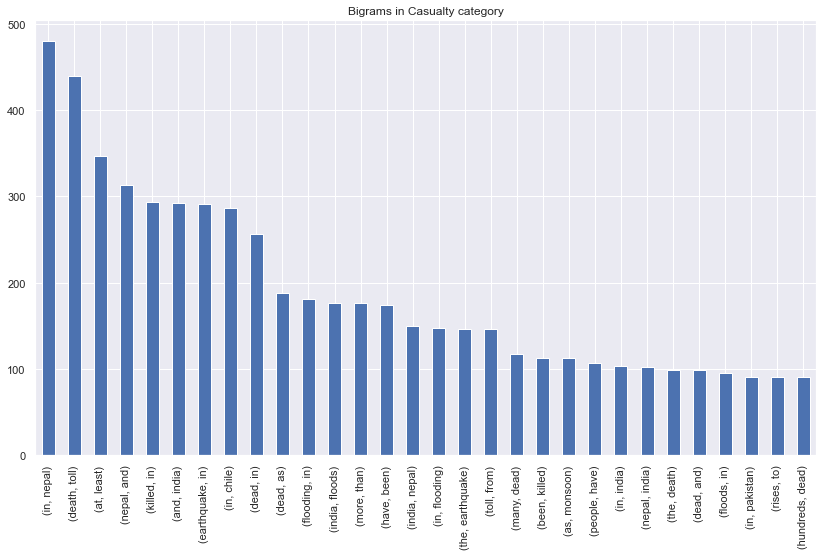

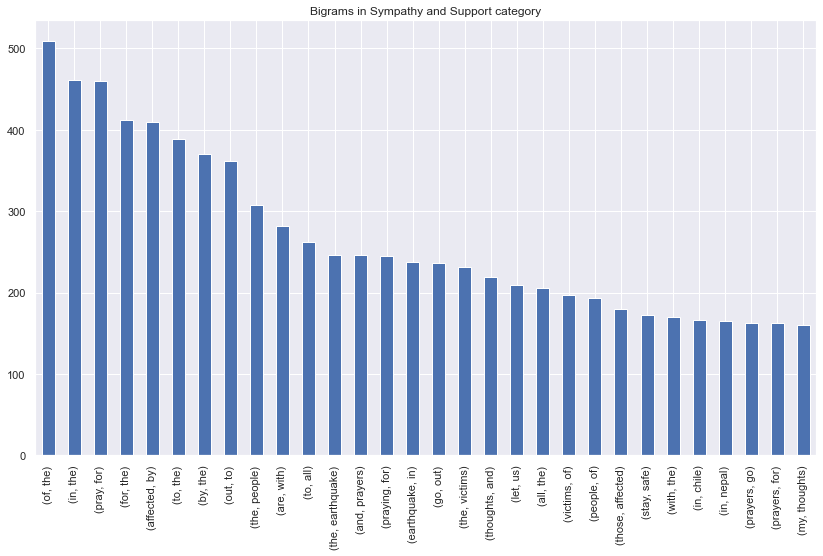

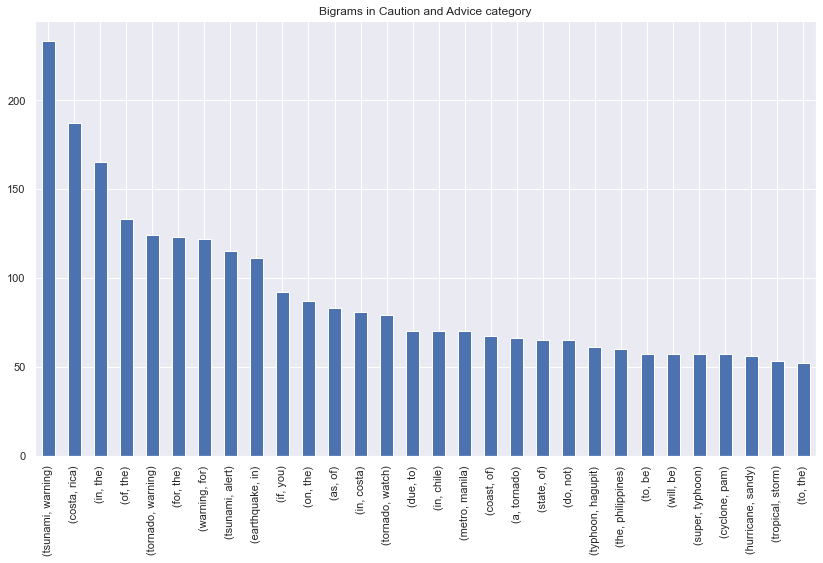

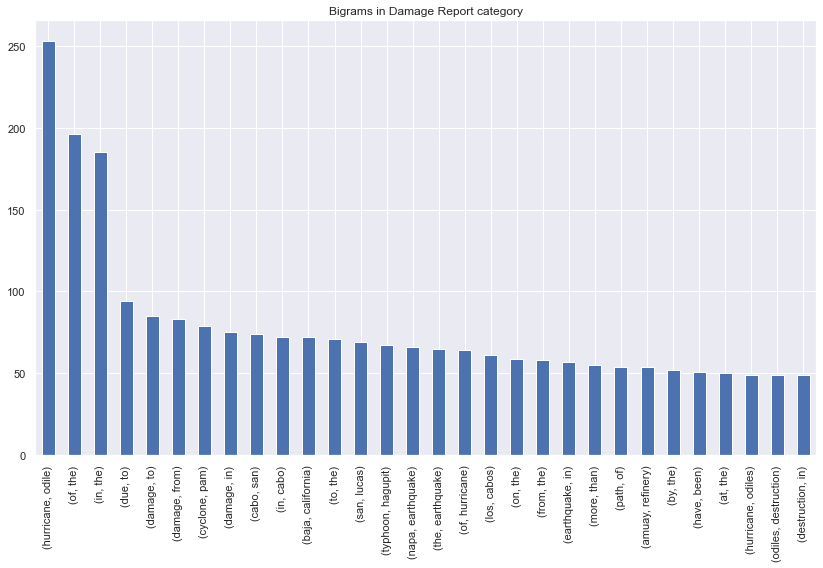

In [53]:
for category in tweets['Category'].unique():
    tweet_tokens = [word for tweet in tweets[tweets['Category'] == category]['Tweet'] for word in tweet.split()]
    token_grams = ngrams(tweet_tokens, 2)
    fdist = FreqDist(token_grams)
    
    fig = plt.figure(figsize=(14,8))
    ax = fig.gca()

    pd.Series(dict(fdist.most_common(30))).plot(kind='bar', ax=ax)
    plt.title('Bigrams in ' + category + ' category')

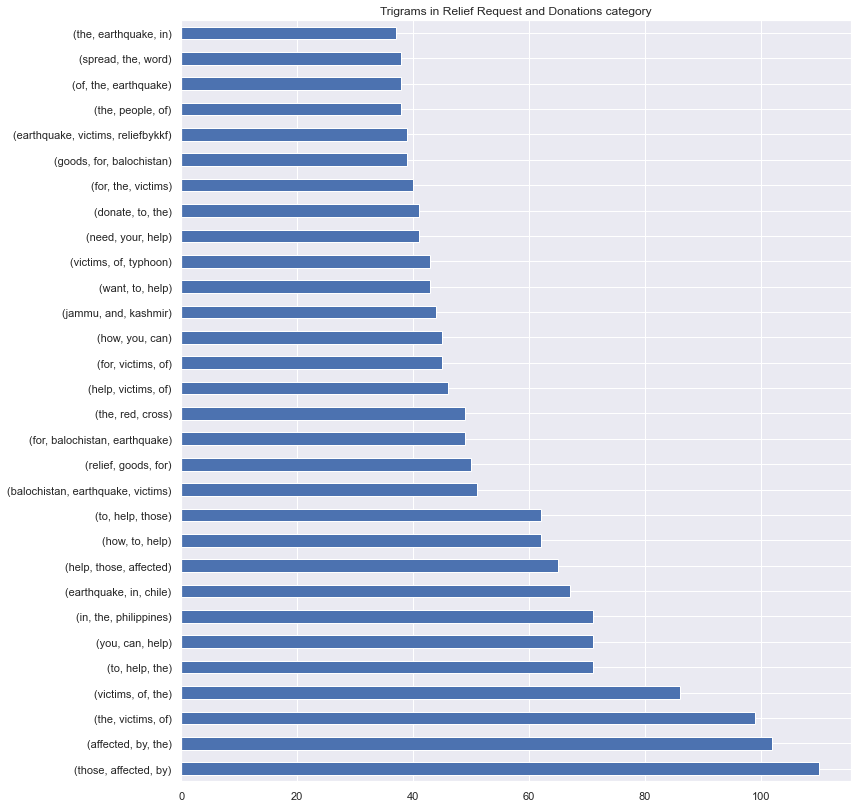

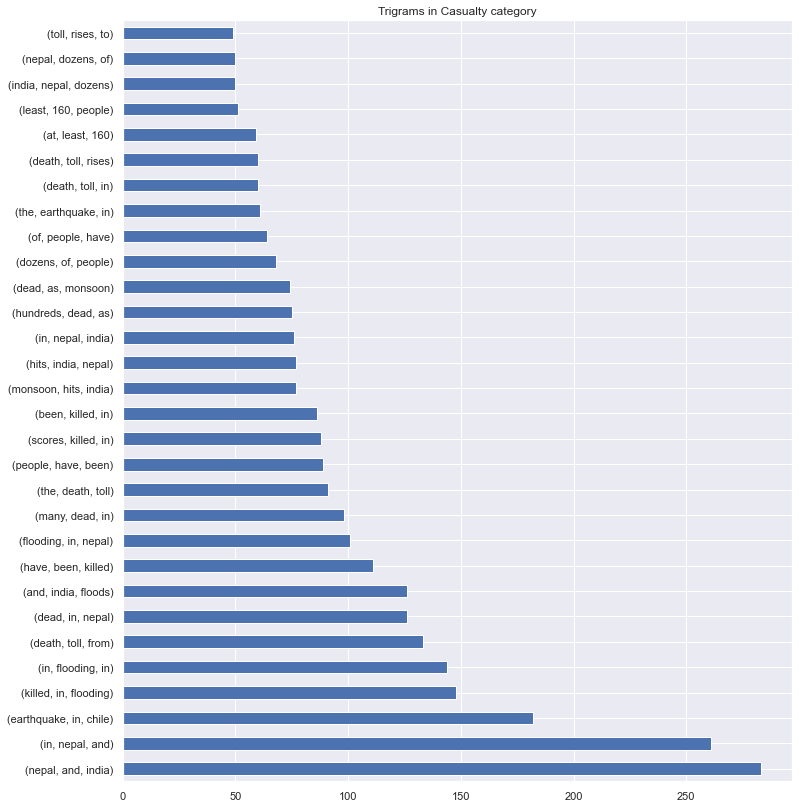

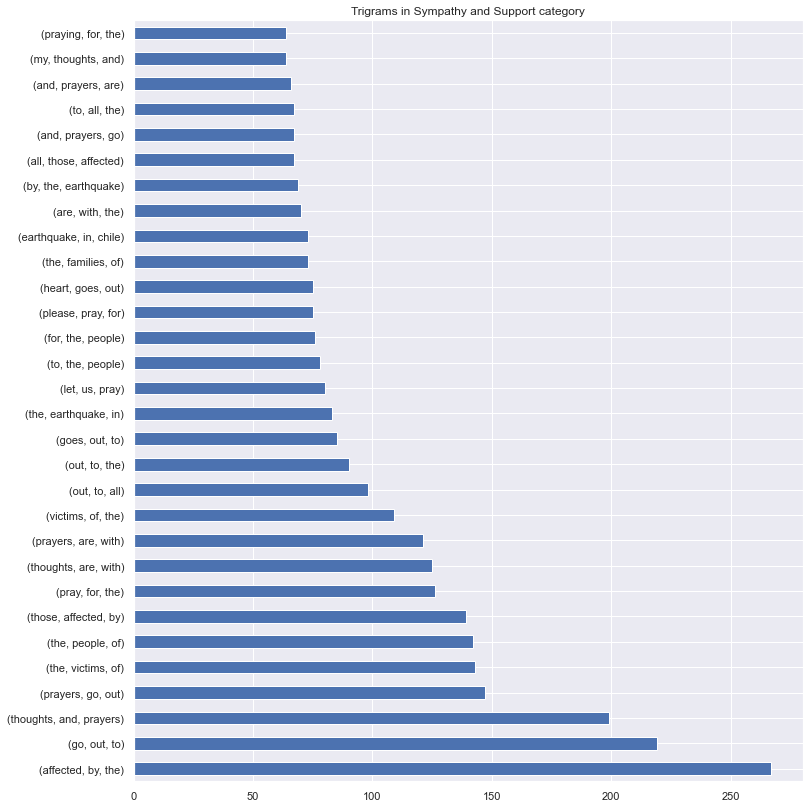

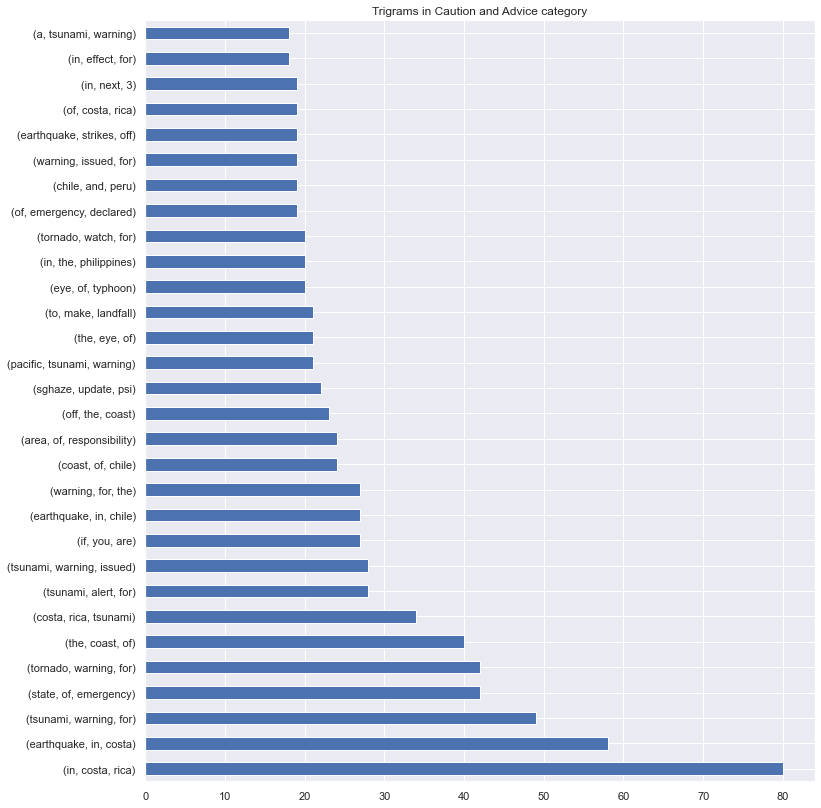

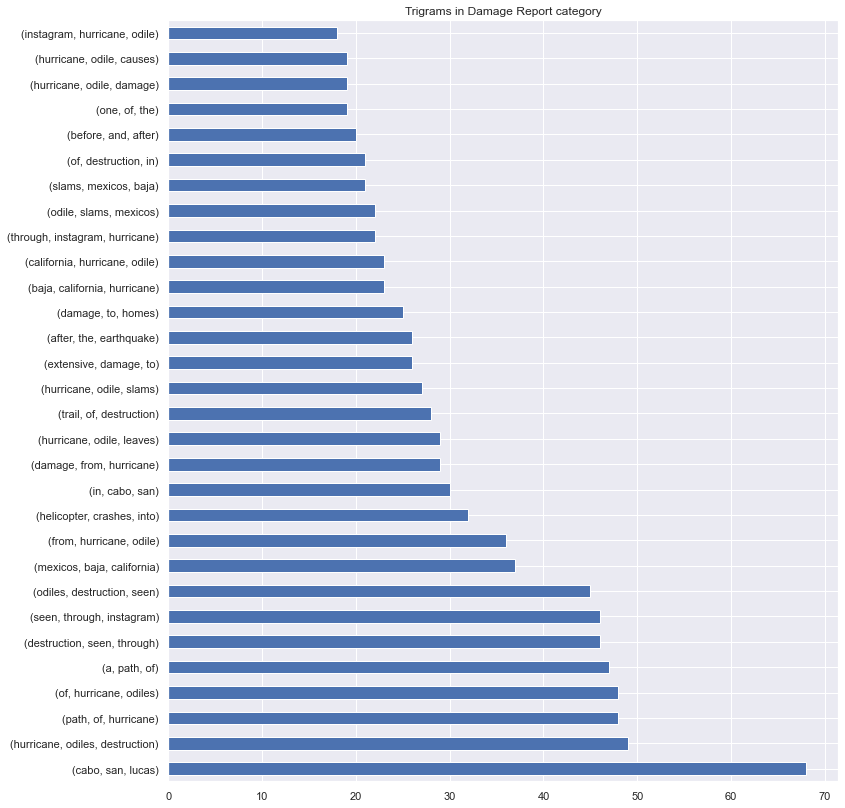

In [54]:
for category in tweets['Category'].unique():
    tweet_tokens = [word for tweet in tweets[tweets['Category'] == category]['Tweet'] for word in tweet.split()]
    token_grams = ngrams(tweet_tokens, 3)
    fdist = FreqDist(token_grams)
    
    fig = plt.figure(figsize=(12,14))
    ax = fig.gca()

    pd.Series(dict(fdist.most_common(30))).plot(kind='barh', ax=ax)
    plt.title('Trigrams in ' + category + ' category')

<AxesSubplot:>

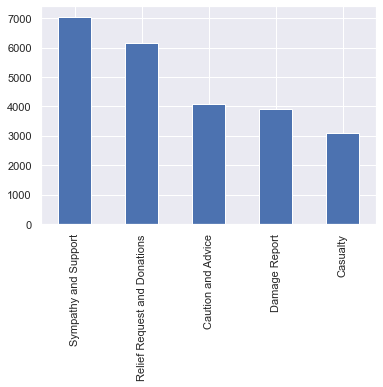

In [58]:
tweets['Category'].value_counts().plot(kind="bar")

### Resample the Data

In [60]:
# Resample tweets to ensure they are almost uniformly distributed
num_tweets = 4000

sympathy_indices =  tweets[tweets['Category'] == "Sympathy and Support"].index
caution_indices =  tweets[tweets['Category'] == "Caution and Advice"].index
relief_indices =  tweets[tweets['Category'] == "Relief Request and Donations"].index
damage_indices = tweets[tweets['Category'] == "Damage Report"].index
casualty_indices = tweets[tweets['Category'] == "Casualty"].index

In [61]:
sympathy_random_idx = np.random.choice(sympathy_indices, size=num_tweets, replace=False)
caution_random_idx = np.random.choice(caution_indices, size=num_tweets, replace=False)
relief_random_idx = np.random.choice(relief_indices, size=num_tweets, replace=False)

In [62]:
print(len(sympathy_random_idx))
print(len(caution_random_idx))
print(len(relief_random_idx))
print(len(damage_indices))
print(len(casualty_indices))

4000
4000
4000
3918
3097


In [63]:
resample_indices = np.hstack((sympathy_random_idx, caution_random_idx, relief_random_idx, damage_indices, casualty_indices))

In [64]:
len(resample_indices)

19015

In [65]:
tweets = tweets.loc[resample_indices]

In [66]:
# Save preprocessed tweets to file
tweets.to_csv(os.path.join(data_dir,'Preprocessed_tweets.csv'), index=False)